In [1]:
import numpy as np 
import pandas as pd 

In [2]:
car = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Car%20Price%20Analysis.csv")

In [3]:
car.head()

,carlength,carwidth,carheight,price,Affordable
0,141.1,60.3,47.8,5151.0,YES
1,144.6,61.8,48.8,5195.0,YES
2,144.6,62.5,48.8,5389.0,YES
3,150.0,63.6,49.4,5399.0,YES
4,150.0,63.6,49.4,5499.0,YES


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carlength   119 non-null    float64
 1   carwidth    119 non-null    float64
 2   carheight   119 non-null    float64
 3   price       119 non-null    float64
 4   Affordable  119 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [5]:
car[car['Affordable']=="YES"].count()

carlength     68
carwidth      68
carheight     68
price         68
Affordable    68
dtype: int64

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

<AxesSubplot:xlabel='Affordable', ylabel='count'>

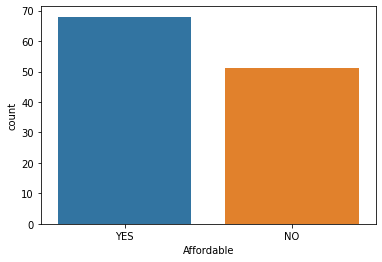

In [8]:
sns.countplot(x='Affordable',data=car)

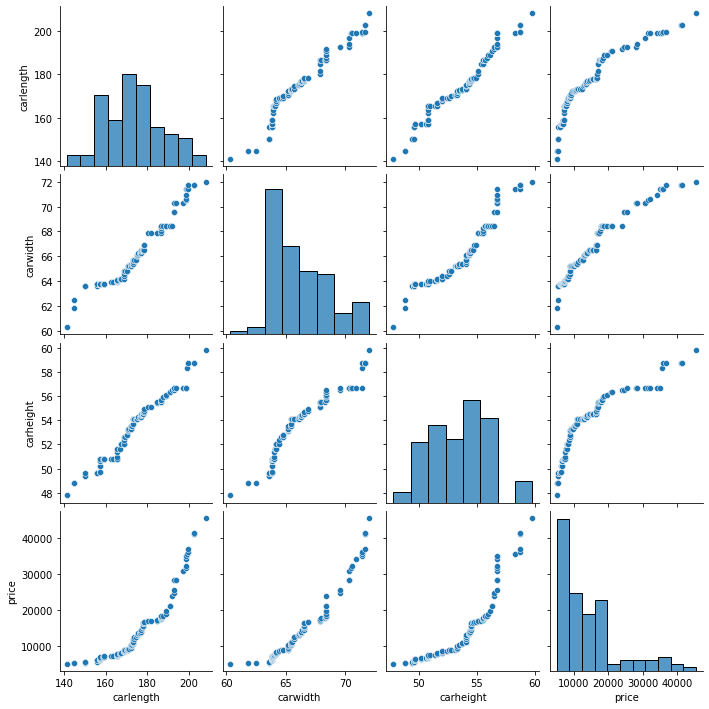

In [9]:
sns.pairplot(car)

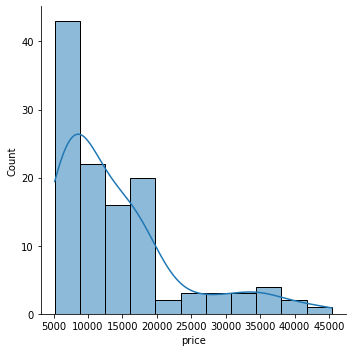

In [10]:
sns.displot(car['price'],kde=True)

<AxesSubplot:>

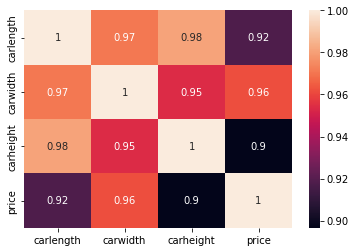

In [11]:
sns.heatmap(car.corr(),annot=True)

<AxesSubplot:xlabel='Affordable', ylabel='price'>

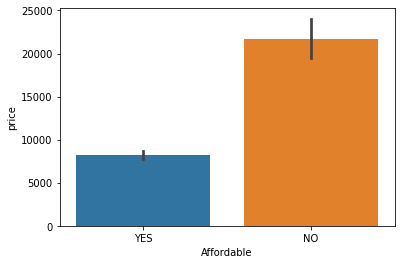

In [12]:
sns.barplot(x='Affordable',y='price',data=car)

<AxesSubplot:xlabel='Affordable', ylabel='price'>

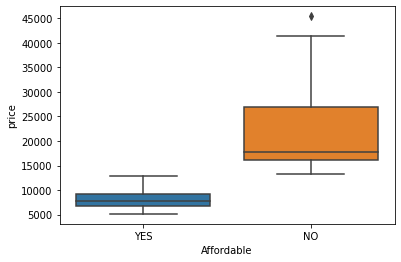

In [13]:
sns.boxplot(x='Affordable',y='price',data=car)

In [15]:
car.sort_values('price',ascending=False).head(5)

,carlength,carwidth,carheight,price,Affordable
118,208.1,72.0,59.8,45400.0,NO
117,202.6,71.7,58.7,41315.0,NO
116,202.6,71.7,58.7,40960.0,NO
115,199.6,71.7,58.7,36880.0,NO
114,199.6,71.4,58.7,36000.0,NO


In [16]:
car.sort_values('price',ascending=True).head(5)

,carlength,carwidth,carheight,price,Affordable
0,141.1,60.3,47.8,5151.0,YES
1,144.6,61.8,48.8,5195.0,YES
2,144.6,62.5,48.8,5389.0,YES
3,150.0,63.6,49.4,5399.0,YES
4,150.0,63.6,49.4,5499.0,YES


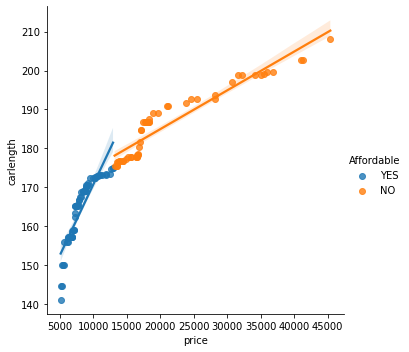

In [17]:
sns.lmplot(x='price',y='carlength',data=car,hue='Affordable')

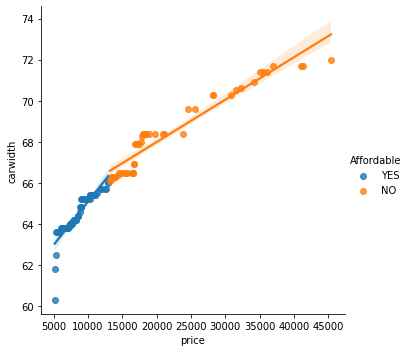

In [18]:
sns.lmplot(x='price',y='carwidth',data=car,hue='Affordable')

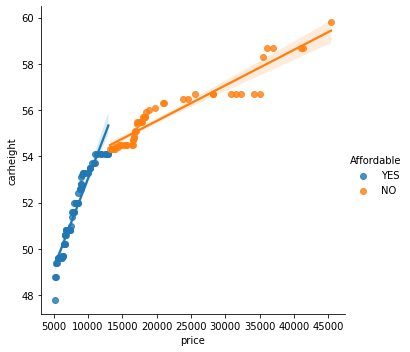

In [19]:
sns.lmplot(x='price',y='carheight',data=car,hue='Affordable')

In [20]:
car.columns

Index(['carlength', 'carwidth', 'carheight', 'price', 'Affordable'], dtype='object')

In [21]:
X=car[['carlength', 'carwidth', 'carheight']]
y=car['price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=47)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.intercept_

-256777.40817226926

In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carlength,-87.215770
carwidth,4823.014181
carheight,-612.193157


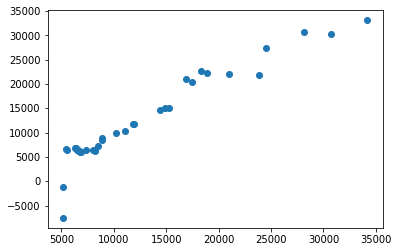

In [24]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)

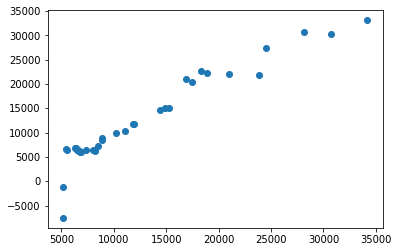

In [25]:
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

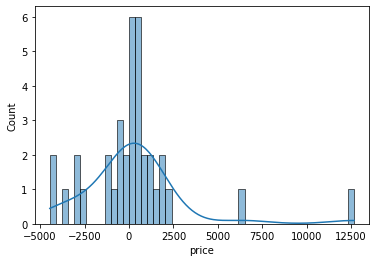

In [26]:
sns.histplot((y_test-predictions),kde=True,bins=50)

In [27]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

1656.9936154860397

In [28]:
metrics.mean_squared_error(y_test,predictions)

8304197.55432081

In [29]:
metrics.mean_squared_error(y_test,predictions)

8304197.55432081

In [30]:
metrics.explained_variance_score(y_test,predictions)

0.8618634714674687

In [31]:
metrics.r2_score(y_test,predictions)

0.8608324083497534